# How I Built and Trained a Neural Network From Scratch Using Python 
## Introduction:

- Briefly explain what neural networks are.
- Highlight why building one from scratch is a valuable learning experience.
- Mention that you'll use Python and NumPy, with code snippets in Jupyter Notebook.

### Setting Up the Environment
Before we start, ensure you have the following:
- Python (preferably version 3.7 or higher)
- Jupyter Notebook installed
- Libraries: NumPy and Matplotlib

Install the required libraries:
```bash
pip install numpy matplotlib


---

#### **3. Building the Neural Network**
Explain the architecture and components of the neural network step by step.

### Building the Neural Network
Let’s start by defining the structure of our neural network:
- **Input Layer**: Takes one input (e.g., x values for a sine function).
- **Hidden Layers**: Two layers with 8 neurons each.
- **Output Layer**: One output neuron (e.g., predicted y value).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from nn_plain import nn_plain

def update_plot(title, saveto=''):
    """
    Updates the plot with visualizations of the neural network and test data.
    
    Parameters:
    nn: An object representing the neural network, which should have
        methods `visualize_network` and `test_plot`.
    """    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
    nn.visualize_network(axes[1])
    # nn.visualize_network(W1, b1, W2, b2, W3, b3, epoch, loss, axes[1])
    # nn_plot(nn.W1, nn.b1, nn.W2, nn.b2, nn.W3, nn.b3, nn.epoch, nn.loss, axes[1])
    nn.test_plot(axes[0], title)
    
    plt.pause(0.1)
    if saveto:
        fig.savefig(frame_path)
    plt.close()
    return plt

## Training the network
The function we are trying to fit is $f(x) = e^{-3x} \cos(16 \pi x)$.


Epoch 0, Loss: 0.053178
Epoch 0, Loss: 0.053178


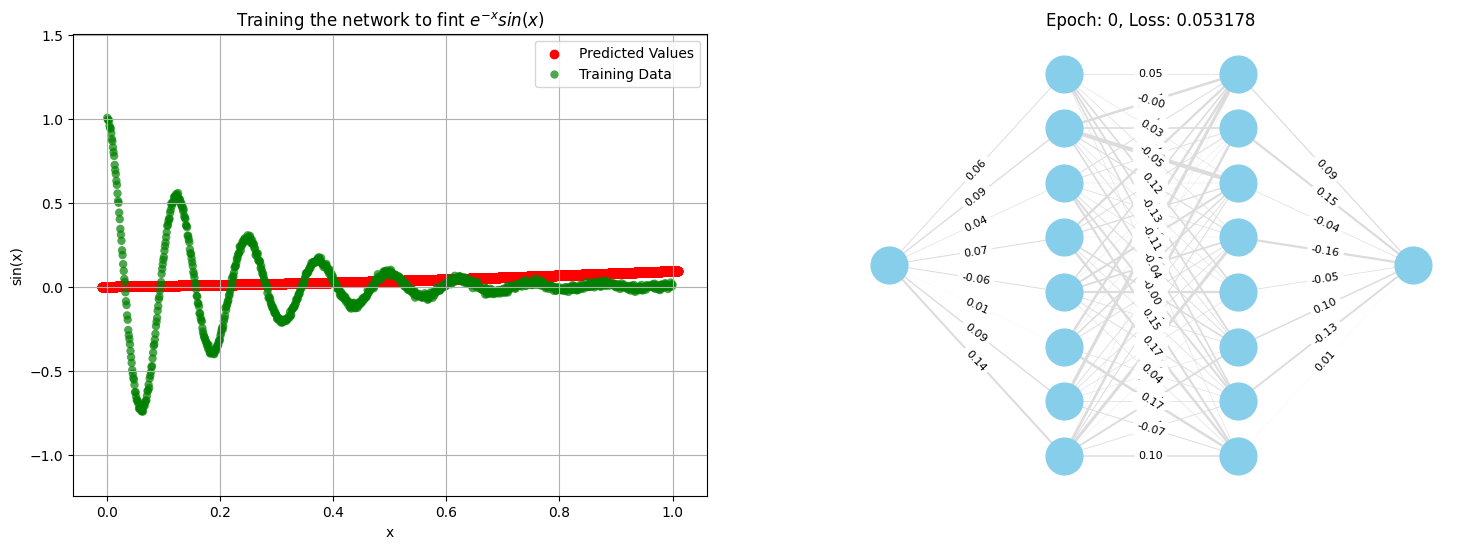

Epoch 0, Loss: 0.053178
Epoch 5000, Loss: 0.050812


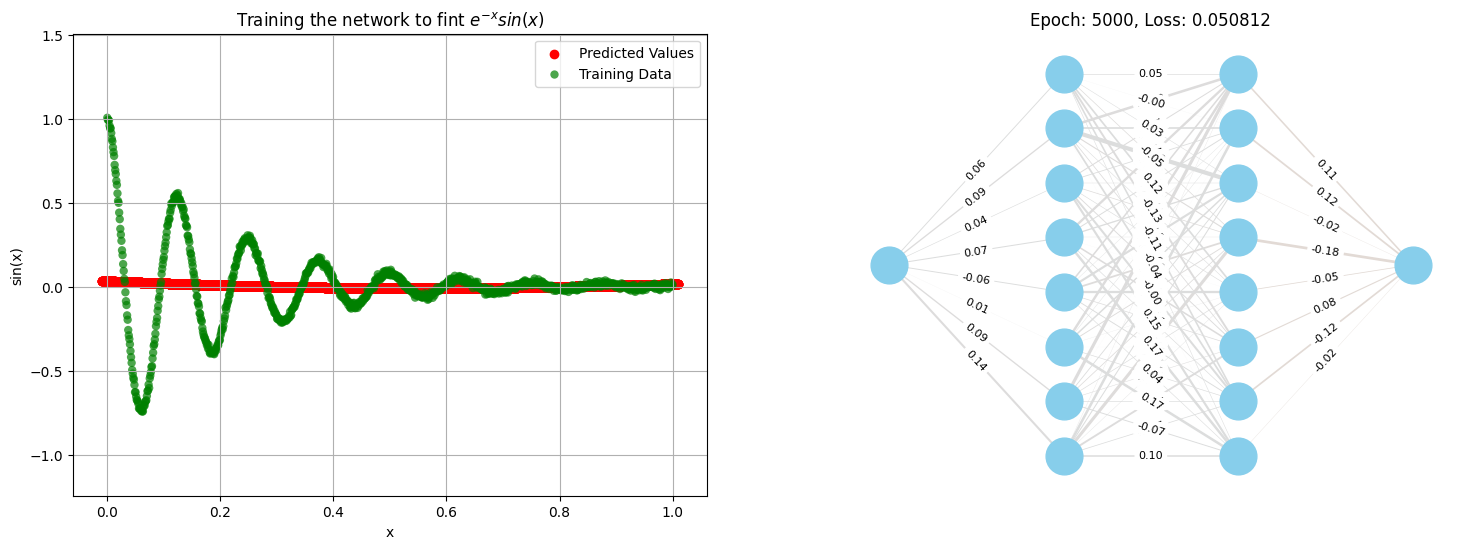

Epoch 5000, Loss: 0.050812
Epoch 10000, Loss: 0.050792


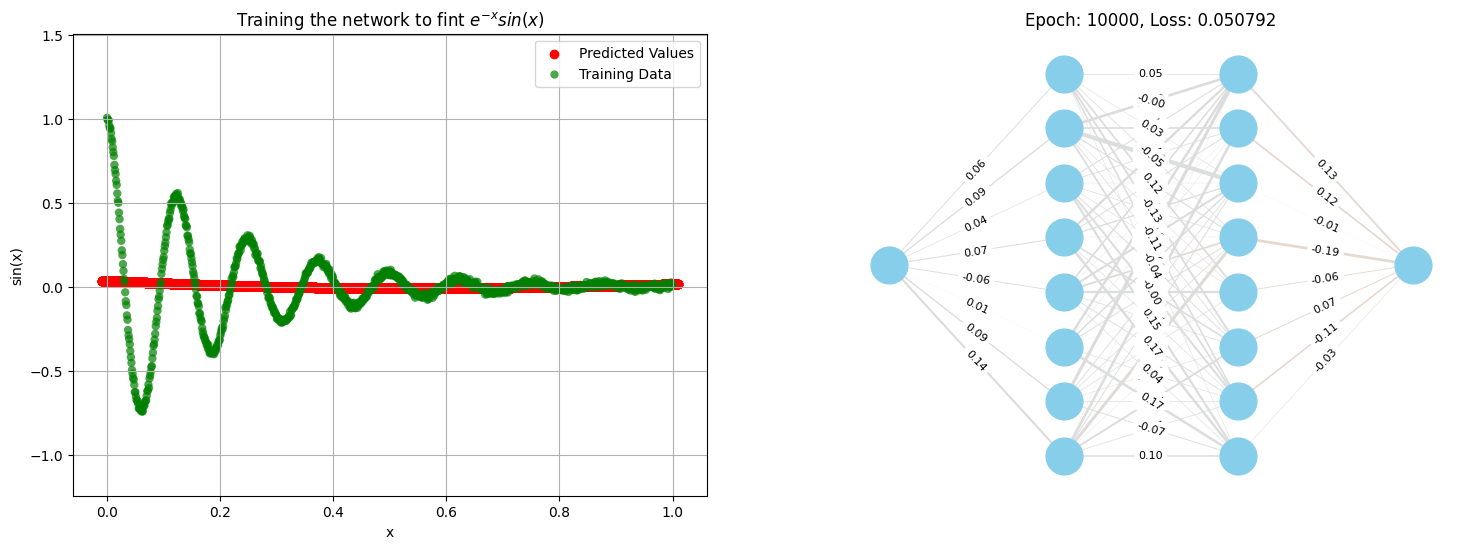

In [2]:
title = "Training the network to fint $e^{-x}sin(x)$"
# Generate training data
x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
# y_train = np.sin(x_train*4*np.pi)  # True sine values
y_train = np.exp(-5*x_train)*np.cos(x_train*16*np.pi)
y_train /= max(y_train) 
y_train += (0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values




nn = nn_plain()
nn.train(x_train, y_train, epochs=0)
update_plot(title= title)
# nn.epochs = 5000
nn.learning_rate = 0.1
for i in [0, 1]:
    nn.train(x_train, y_train, epochs=5000)
    update_plot(title= title)


## Make a training movie:

During each iteration of training, save the current plot as a PNG file. 
After the training loop, use the Pillow library to combine the PNG files into an animated GIF.

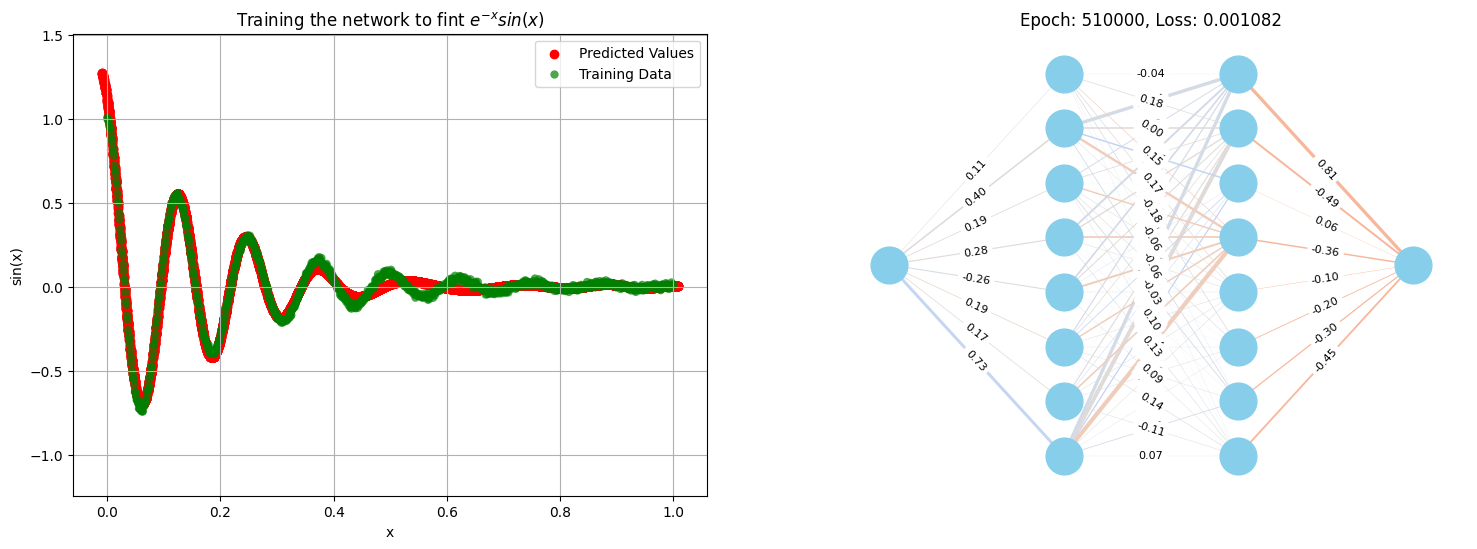

i = 49


In [3]:
from PIL import Image
import os
# Create a directory to save frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)
frame_paths = []  # List to store paths of generated frames

for i in range(50):  # Set a smaller number for testing



    # x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
    # # y_train = np.sin(x_train*2*np.pi)+(0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values
    # y_train = np.exp(4*x_train)+(0.1*np.random.randn(1000)).reshape(-1, 1)  # True sine values

    # Normalize input data for better performance
    # x_train_normalized = x_train / (2 * np.pi)    
    
    nn.train(x_train, y_train, epochs=10000)    
    clear_output(wait=True)  # Clear the previous output in Jupyter Notebook
    frame_path = os.path.join(frames_dir, f"frame_{i:03d}.png")
    plot = update_plot(title= title, saveto=frame_path )
    print(f'i = {i}')
    # Save the frame
    
    
    frame_paths.append(frame_path)
    

In [4]:
# Create an animated GIF
gif_path = "training_animation.gif"
frames = [Image.open(frame) for frame in frame_paths]
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=10,  # Duration of each frame in milliseconds
    loop=1  # Loop infinitely
)

# Clean up: Optionally remove individual frame files
#for frame_path in frame_paths:
#    os.remove(frame_path)

print(f"GIF saved at: {gif_path}")

GIF saved at: training_animation.gif


## Let us double the number of neurons in a layer

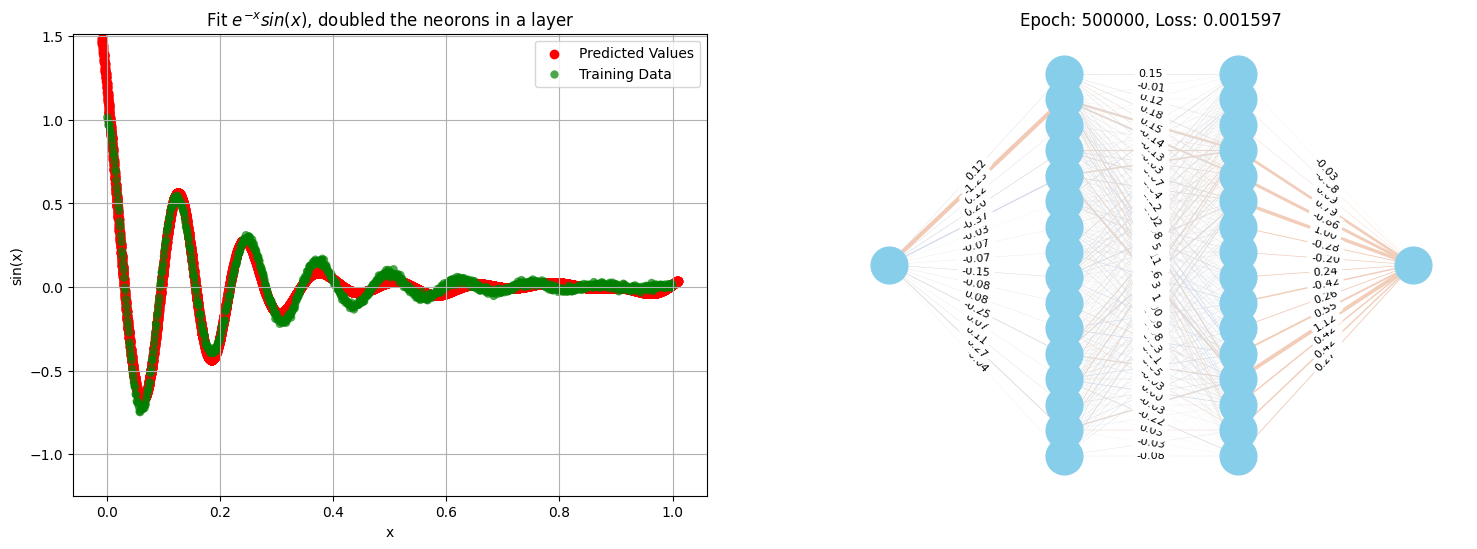

i = 49


In [5]:
title = "Fit $e^{-x}sin(x)$, doubled the neorons in a layer"
# Generate training data
x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
# y_train = np.sin(x_train*4*np.pi)  # True sine values
y_train = np.exp(-5*x_train)*np.cos(x_train*16*np.pi)
y_train /= max(y_train) 
y_train += (0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values




nn = nn_plain(hidden_size1 = 16, hidden_size2 = 16)
nn.train(x_train, y_train, epochs=0)
update_plot(title= title)
clear_output(wait=True)  # Clear the previous output in Jupyter Notebook
# nn.epochs = 5000
for i in range(50):  # Set a smaller number for testing



    # x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
    # # y_train = np.sin(x_train*2*np.pi)+(0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values
    # y_train = np.exp(4*x_train)+(0.1*np.random.randn(1000)).reshape(-1, 1)  # True sine values

    # Normalize input data for better performance
    # x_train_normalized = x_train / (2 * np.pi)    
    
    nn.train(x_train, y_train, epochs=10000)    
    clear_output(wait=True)  # Clear the previous output in Jupyter Notebook
    frame_path = os.path.join(frames_dir, f"fram_n16_{i:03d}.png")
    plot = update_plot(title= title, saveto=frame_path )
    print(f'i = {i}')
    # Save the frame
    
    
    frame_paths.append(frame_path)


In [6]:
# Create an animated GIF
gif_path = "training_animation_n16.gif"
frames = [Image.open(frame) for frame in frame_paths]
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=10,  # Duration of each frame in milliseconds
    loop=1  # Loop infinitely
)

# Clean up: Optionally remove individual frame files
#for frame_path in frame_paths:
#    os.remove(frame_path)

print(f"GIF saved at: {gif_path}")

GIF saved at: training_animation_n16.gif


In [7]:
import pickle

# Assuming `nn` is your trained neural network object
with open('trained_nn.pkl', 'wb') as f:
    pickle.dump(nn, f)
# # Load the trained model back
# with open('trained_nn.pkl', 'rb') as f:
#     nn_loaded = pickle.load(f)    

## Fitting of the Lennard-Jones Potential curve
Now let us try to reteach the network to compleatelly different type of curve

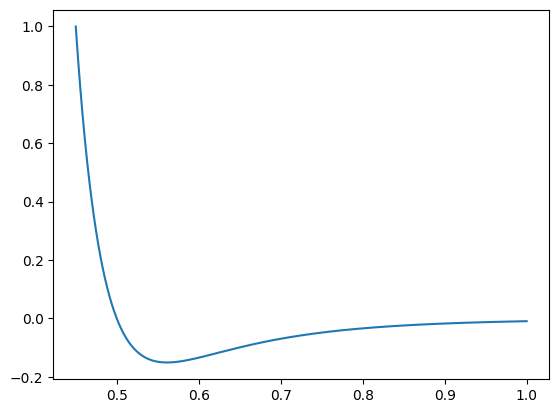

In [8]:
def lennard_jones_potential(r, epsilon, sigma):
    """
    Calculate the Lennard-Jones potential.
    
    Parameters:
    r (float): Distance between the two particles.
    epsilon (float): Depth of the potential well.
    sigma (float): Distance at which the potential is zero.
    
    Returns:
    float: The Lennard-Jones potential at distance r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Example usage
r = 1.0  # distance between particles
epsilon = 1.0  # depth of the potential well
sigma = 1.0  # distance at which the potential is zero

X = np.linspace(0.9,2,1000)
Y = lennard_jones_potential(X, epsilon, sigma)
# V = lennard_jones_potential(2, epsilon, sigma)


x_train = X / max(X)
y_train = Y / max(Y) 

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)


# y_train += (0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values

plt.plot(x_train, y_train)
# print("Lennard-Jones potential:", y_train)

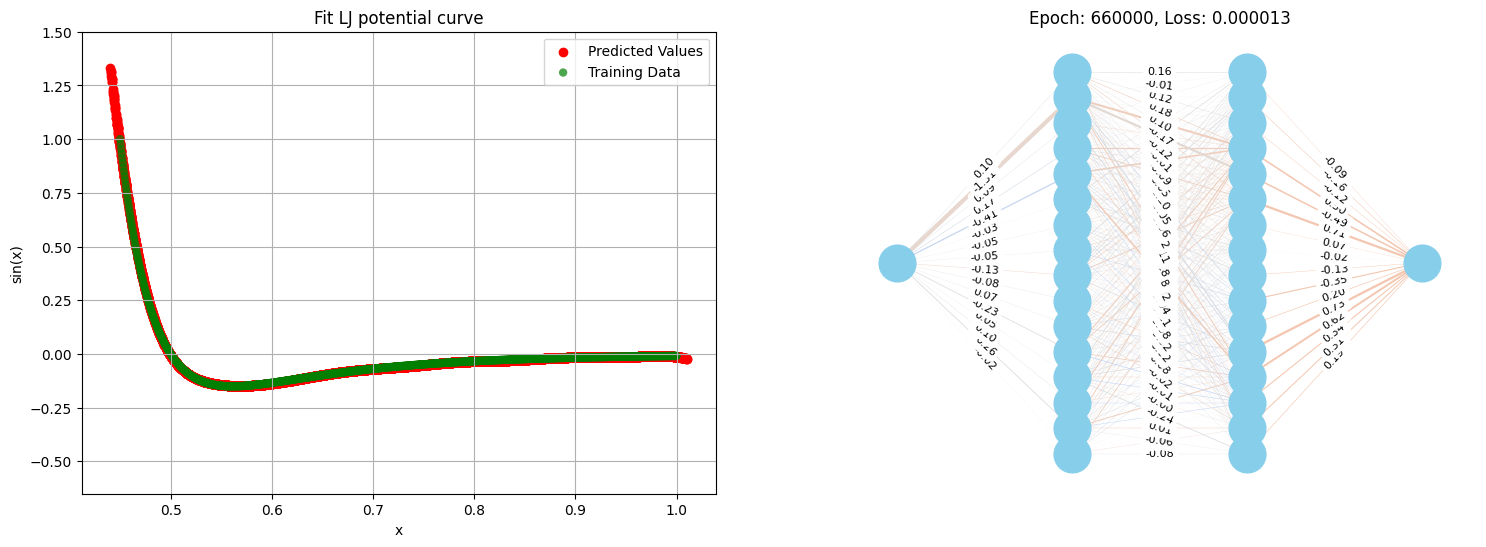

Epoch 660000, Loss: 0.000013


In [ ]:
title = "Fit LJ potential curve"

for i in range(30):  # Set a smaller number for testing


    # x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
    # # y_train = np.sin(x_train*2*np.pi)+(0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values
    # y_train = np.exp(4*x_train)+(0.1*np.random.randn(1000)).reshape(-1, 1)  # True sine values

    # Normalize input data for better performance
    # x_train_normalized = x_train / (2 * np.pi)    
    frame_path = os.path.join(frames_dir, f"frameLJ_{i:03d}.png")
    nn.train(x_train, y_train, epochs=10000)    
    clear_output(wait=True)  # Clear the previous output in Jupyter Notebook
    update_plot(title= title, saveto=frame_path )


In [ ]:
# And teache the network from scratch
nn = nn_plain()
nn.train(x_train, y_train, epochs=0)
update_plot(title)
# nn.epochs = 5000
nn.learning_rate = 0.1
for i in [0, 1]:
    nn.train(x_train, y_train, epochs=1000)
    update_plot(title)



In [ ]:
for i in range(30):  # Set a smaller number for testing


    # x_train = np.linspace(0, 1, 1000).reshape(-1, 1)  # Inputs: (1000, 1)
    # # y_train = np.sin(x_train*2*np.pi)+(0.01*np.random.randn(1000)).reshape(-1, 1)  # True sine values
    # y_train = np.exp(4*x_train)+(0.1*np.random.randn(1000)).reshape(-1, 1)  # True sine values

    # Normalize input data for better performance
    # x_train_normalized = x_train / (2 * np.pi)    
    
    frame_path = os.path.join(frames_dir, f"frameLJ_{i:03d}.png")
    nn.train(x_train, y_train, epochs=10000)    
    clear_output(wait=True)  # Clear the previous output in Jupyter Notebook
    update_plot(title= title, saveto=frame_path )    


In [ ]:
# Define a function to add as a method
def new_method(self):
    return f"Value is {self.value}"

nn.new_method = new_method
